In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
import string
import joblib

# Download stopwords if not already
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv("data/reviews.csv")
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review_text,sentiment
0,"This product is amazing, I loved it!",positive
1,"Worst purchase ever, completely disappointed.",negative
2,The quality is good for the price.,positive
3,"Terrible, broke after one use.",negative
4,Excellent value and fast delivery.,positive


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  20 non-null     object
 1   sentiment    20 non-null     object
dtypes: object(2)
memory usage: 452.0+ bytes
None

Class distribution:
 sentiment
positive    10
negative     9
neutral      1
Name: count, dtype: int64


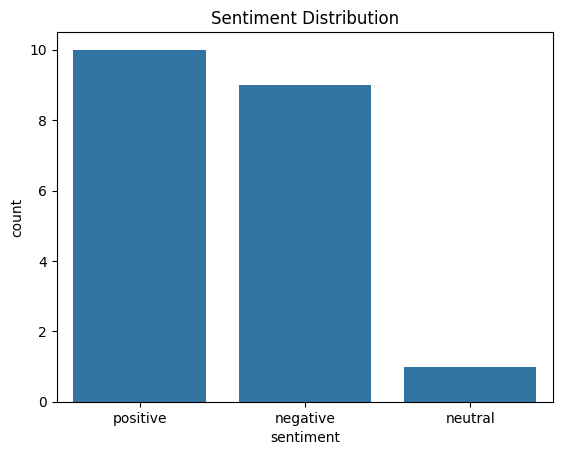

In [3]:
print(df.info())
print("\nClass distribution:\n", df['sentiment'].value_counts())

# Visualize class distribution
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()


In [4]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['review_text'].apply(clean_text)
df[['review_text', 'clean_text']].head()


,review_text,clean_text
0,"This product is amazing, I loved it!",product amazing loved
1,"Worst purchase ever, completely disappointed.",worst purchase ever completely disappointed
2,The quality is good for the price.,quality good price
3,"Terrible, broke after one use.",terrible broke one use
4,Excellent value and fast delivery.,excellent value fast delivery


In [8]:
df = df[df['sentiment'] != 'neutral']
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']
print(f"Feature matrix shape: {X.shape}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")



Feature matrix shape: (19, 50)
Train size: 15, Test size: 4


Model training complete.
Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod

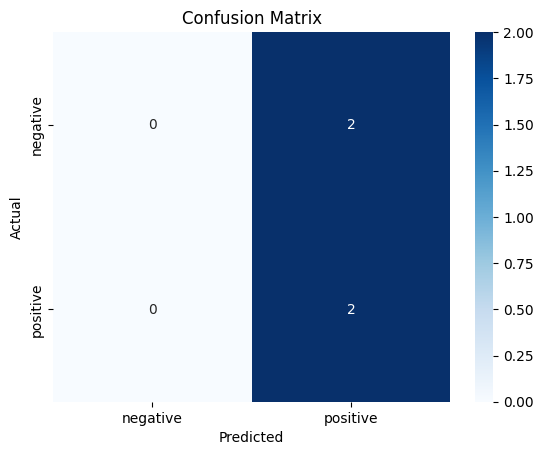

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model training complete.")

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [10]:
import os
# Create models directory if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")

joblib.dump(model, "models/sentiment_model.pkl")
joblib.dump(vectorizer, "models/vectorizer.pkl")
print("Model and vectorizer saved successfully.")




Model and vectorizer saved successfully.
